# Trabajo práctico integrador.

## Análisis de datos.

### Datos de distintas canciones en Spotify

### Análisis exploratorio inicial

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset from GitHub repository
df = pd.read_csv('https://raw.githubusercontent.com/ldidone/analisis_de_datos_CEIA_TP/main/data/data_playlist.csv')

In [3]:
# Show first 10 rows
df.head(10)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
5,0.524,0.633,244360,0.401,0.000000,4,0.1230,-12.549,1,0.0439,134.978,4,0.523,1
6,0.597,0.507,183573,0.795,0.000000,9,0.2960,-6.966,1,0.0607,165.540,4,0.900,0
7,0.452,0.825,259102,0.435,0.609000,1,0.0953,-9.582,1,0.0568,119.038,4,0.243,1
8,0.748,0.420,366179,0.324,0.839000,9,0.0723,-14.700,0,0.0556,183.020,3,0.330,1
9,0.913,0.292,197613,0.246,0.088300,0,0.2090,-9.758,1,0.0330,140.316,4,0.249,1


In [4]:
# Describe dataset principal statistics
df.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


In [5]:
# Identify datatypes
df.dtypes

acousticness        float64
danceability        float64
duration              int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
label                 int64
dtype: object

### Descripción de las variables.
Se identifican los tipos de datos de las variables. Además se clasifican en variables de entrada y de salida.

| Variable         | Tipo de dato        | Descripción                                                                                  | ¿Es informativa para un problema de clasificación? | Entrada o salida |
|------------------|---------------------|----------------------------------------------------------------------------------------------|----------------------------------------------------|------------------|
| acousticness     | Numérico (ordinal). | Indica el grado de acusticidad de una canción.                                               | Sí                                                | Entrada          |
| danceability     | Numérico (ordinal). | Indica que tan bailable es una canción.                                                      | Sí                                                 | Entrada          |
| energy           | Numérico (ordinal). | Indica el nivel de energía de una canción.                                                   | Sí                                                 | Entrada          |
| instrumentalness | Numérico (ordinal). | Indica qué tan instrumental es una canción.                                                  | Sí                                                 | Entrada          |
| key              | Categórico.         | Indica la tonalidad en la que se encuentra la canción.                                       | Sí                                                 | Entrada          |
| liveness         | Numérico (ordinal). | Indica qué tan "en vivo" es la canción.                                                      | Sí                                                 | Entrada          |
| loudness         | Numérico (ordinal). | Indica el volumen general de una pista en decibelios (dB)                                    | Sí                                                 | Entrada          |
| mode             | Categórico.         | Indica la modalidad (mayor o menor) de una canción. Contenido melódico.                      | Sí.                                                | Entrada          |
| speechiness      | Numérico (ordinal). | Indica la proporción de discurso que hay en la canción.                                      | Sí                                                 | Entrada          |
| tempo            | Numérico (ordinal). | El tempo general estimado de una pista en pulsaciones por minuto (BPM).                      | Sí                                                 | Entrada          |
| time_signature   | Categórico.         | El compás es una convención de notación para especificar cuántos tiempos hay en cada compás. | Sí                                                 | Entrada          |
| valence          | Numérico (ordinal)  | Describe la positividad musical que transmite una canción.                                   | Sí                                                 | Entrada          |
| label            | Categórico.         | Indica si la canción es del gusto de la persona que tiene esta playlist activa               | No (ya que es la variable de salida)               | Salida           |

### Referencia:
- [Enlace de interés](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-analysis)

### Análisis de las Variables de entrada

In [6]:
df.skew()

acousticness        0.534804
danceability       -0.311981
duration            1.576231
energy             -0.458765
instrumentalness    2.488166
key                 0.151431
liveness            2.156240
loudness           -1.693115
mode               -1.104435
speechiness         2.040370
tempo               0.334763
time_signature     -3.789628
valence             0.104812
label              -0.420449
dtype: float64

In [7]:
df.kurt(numeric_only=True)

acousticness        -1.210296
danceability        -0.296706
duration             8.321863
energy              -0.758962
instrumentalness     4.518012
key                 -1.349730
liveness             4.842701
loudness             3.232917
mode                -0.782316
speechiness          4.149336
tempo               -0.246166
time_signature      22.280112
valence             -0.911007
label               -1.828105
dtype: float64

In [8]:
  df['acousticness'].describe()

count    750.000000
mean       0.357394
std        0.338405
min        0.000001
25%        0.037150
50%        0.244500
75%        0.678500
max        0.994000
Name: acousticness, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


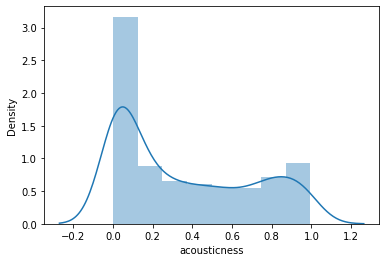

In [9]:
sns.distplot(df['acousticness'])

In [10]:
df['danceability'].describe()

count    750.000000
mean       0.596439
std        0.172036
min        0.107000
25%        0.480000
50%        0.606000
75%        0.715750
max        0.986000
Name: danceability, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


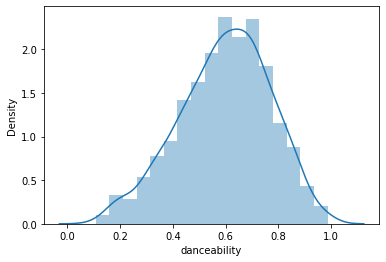

In [11]:
sns.distplot(df['danceability'])

In [12]:
df['energy'].describe()

count    750.000000
mean       0.594188
std        0.253301
min        0.009250
25%        0.423250
50%        0.631500
75%        0.804750
max        0.995000
Name: energy, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


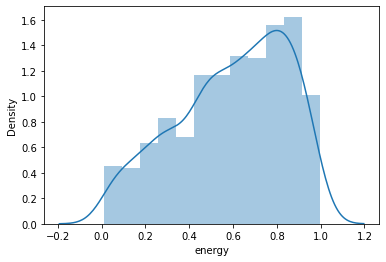

In [13]:
sns.distplot(df['energy'])

In [14]:
df['instrumentalness'].describe()

count    750.000000
mean       0.100245
std        0.259921
min        0.000000
25%        0.000000
50%        0.000010
75%        0.002245
max        0.967000
Name: instrumentalness, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


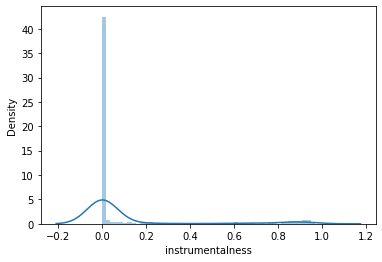

In [15]:
sns.distplot(df['instrumentalness'])

In [16]:
df['liveness'].describe()

count    750.000000
mean       0.203376
std        0.177609
min        0.024000
25%        0.094550
50%        0.129000
75%        0.264750
max        0.979000
Name: liveness, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


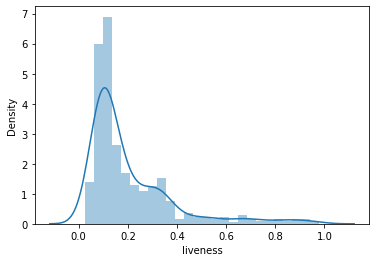

In [17]:
sns.distplot(df['liveness'])

In [18]:
df['loudness'].describe() 

count    750.000000
mean      -8.509339
std        5.039488
min      -29.601000
25%      -10.173500
50%       -7.270000
75%       -5.097750
max       -0.533000
Name: loudness, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


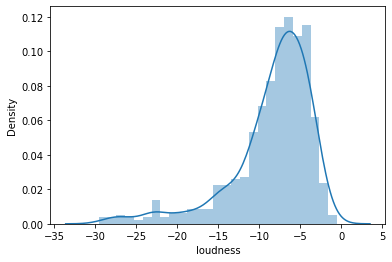

In [19]:
sns.distplot(df['loudness'])

In [20]:
df['speechiness'].describe()

count    750.000000
mean       0.098966
std        0.104715
min        0.023400
25%        0.035900
50%        0.048750
75%        0.113000
max        0.721000
Name: speechiness, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


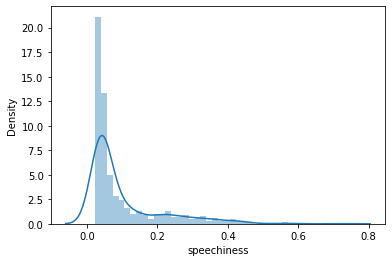

In [21]:
sns.distplot(df['speechiness'])

In [22]:
df['tempo'].describe()

count    750.000000
mean     120.405761
std       28.378116
min       55.747000
25%       98.998000
50%      120.104500
75%      138.074750
max      204.162000
Name: tempo, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


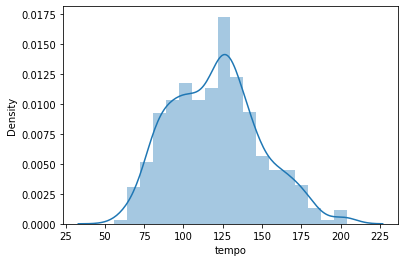

In [23]:
sns.distplot(df['tempo'])

In [24]:
df['valence'].describe()

count    750.000000
mean       0.497321
std        0.239615
min        0.033200
25%        0.297000
50%        0.483000
75%        0.684500
max        0.975000
Name: valence, dtype: float64

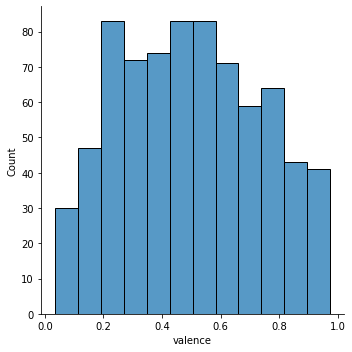

In [25]:
sns.displot(df['valence'])

### Conclusiones:
A excepción de las columnas "acousticness", la aproximación de las features del dataset de Spotify a una variable normal es correcta (en el caso de "acousticness", se podría aproximar a 2 normales).  

En cuanto a la curtosis de las features, las columnas duration,instrumentalness, liveness, loudness, speechiness y time_signature presentan distribuciones leptocúrticas (mayor concentración alrededor de la media), mientras que las restantes features presentan una distribución platicúrtica.

Con respecto a la oblicuidad de las features o "skewness", se consideran bastante simétricas: ‘acousticness’, danceability, energy, key, tempo y valence, mientras que las restantes features, se consideran considerablemente asimétricas.

In [26]:
pd.value_counts(df['key'])

0     113
2      92
1      85
9      74
5      69
7      63
8      51
4      48
10     48
11     46
6      44
3      17
Name: key, dtype: int64

### Tabla de frecuencia relativa para la feature key

In [27]:
100*df['key'].value_counts() / len(df['key'])

0     15.066667
2     12.266667
1     11.333333
9      9.866667
5      9.200000
7      8.400000
8      6.800000
4      6.400000
10     6.400000
11     6.133333
6      5.866667
3      2.266667
Name: key, dtype: float64

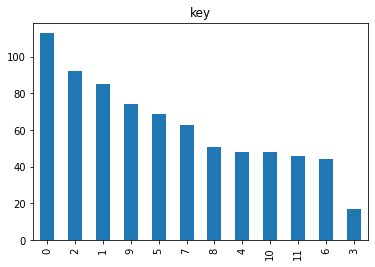

In [28]:
plot = df['key'].value_counts().plot(kind='bar', title='key')

In [29]:
pd.value_counts(df['mode'])

1    556
0    194
Name: mode, dtype: int64

In [30]:
100*df['mode'].value_counts() / len(df['mode'])

1    74.133333
0    25.866667
Name: mode, dtype: float64

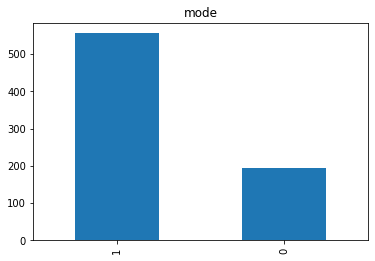

In [31]:
plot = df['mode'].value_counts().plot(kind='bar', title='mode')

In [32]:
pd.value_counts(df['time_signature'])

4    671
3     64
5      9
1      6
Name: time_signature, dtype: int64

In [33]:
100*df['key'].value_counts() / len(df['time_signature'])

0     15.066667
2     12.266667
1     11.333333
9      9.866667
5      9.200000
7      8.400000
8      6.800000
4      6.400000
10     6.400000
11     6.133333
6      5.866667
3      2.266667
Name: key, dtype: float64

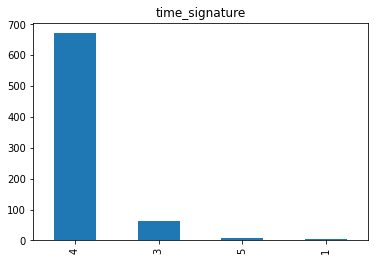

In [34]:
plot = df['time_signature'].value_counts().plot(kind='bar', title='time_signature')

**En lo referente a las features con variables categóricas, las features "time_signature" (tipo de compás) y "mode" (modos de un tono: mayor o menor), son las de menor número de variables categóricas. La feature "key" (tono), es la de mayor cantidad número de variables.**

- No se evidencian variables compuestas

### Análisis de las variables de salida

In [35]:
100*df['label'].value_counts() / len(df['label'])

1    60.266667
0    39.733333
Name: label, dtype: float64

-  La variable de salida "label" (like o no de una canción) se encuentra bastante balanceada. (Aunque se evidencia un cierto desbalance en favor de la clase 1.